https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data


In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./data/GlobalLandTemperaturesByMajorCity.csv',parse_dates=['dt'])

In [7]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [8]:
df.shape

(239177, 7)

In [15]:
import re
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
#     fld_dtype = fld.dtypes[0]
    
#     if not np.issubdtype(fld_dtype, np.datetime64):
#         df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
        
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'
           ]
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [16]:
add_datepart(df,'dt')
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,dtYear,dtMonth,dtWeek,dtDay,dtDayofweek,dtDayofyear,dtElapsed
0,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1,1,0,1,-3818361600
1,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,5,1,3,32,-3815683200
2,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,9,1,3,60,-3813264000
3,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,13,1,6,91,-3810585600
4,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,18,1,1,121,-3807993600


In [31]:
print(len(df.dtYear.unique()))
valid_idx =[idx for idx in list(df.dtYear) if (idx >2010 or idx in [1975,1995,2007,1875,1876,1877])] 
print(len(valid_idx))

271
10464


In [32]:
from fastai import *
from fastai.tabular import *

In [35]:
print(len(valid_idx),df.shape)
cat_names = ['City','Country']
dep_var = 'AverageTemperature'

10464 (239177, 13)


Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'dtYear', 'dtMonth', 'dtWeek',
       'dtDay', 'dtDayofweek', 'dtDayofyear', 'dtElapsed'],
      dtype='object')

In [42]:
procs = [FillMissing, Categorify, Normalize]
df_pred = df.loc[:,['AverageTemperature', 'City','Country','dtYear', 'dtMonth', 'dtWeek','dtDay', 'dtDayofweek', 'dtDayofyear', 'dtElapsed']].dropna()
data = TabularDataBunch.from_df('data', df_pred, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)

In [48]:
learn = tabular_learner(data,[32,32],metrics=mean_absolute_error, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


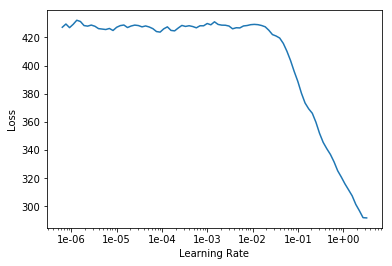

In [49]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,4.764477,0.423529,0.472034,00:23


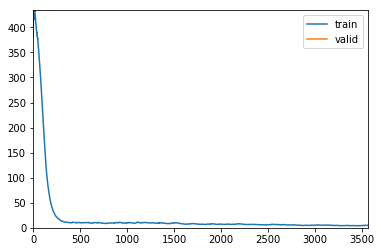

In [50]:
learn.fit_one_cycle(1,1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


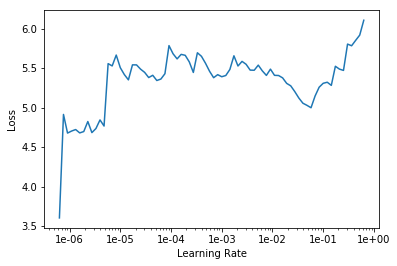

In [52]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,4.432637,0.459815,0.482962,00:23


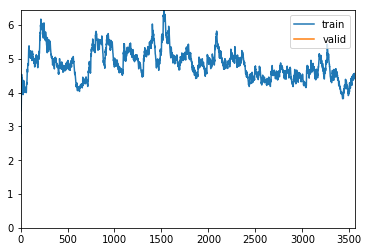

In [53]:
learn.fit_one_cycle(1,1e-2)

In [ ]:
add_cyclic_datepart